In [1]:
import matplotlib.pyplot as plt
from __future__ import division
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np


In [34]:
# compute a probability distribution and draw it
def plot_hist(x):
    hist, bins = np.histogram(np.ravel(x), bins=50)
    prob = hist/x.size
    center = (bins[1:] + bins[:-1])/2
    width = 0.7*(bins[1] - bins[0])
    plt.bar(center, prob, width=width)

Now we make 10K samples, and init a 10-dim weight

In [35]:
x = np.random.randn(10000, 10)
w = np.random.randn(10)
y = np.dot(x, w)
print np.var(x)
print np.var(w)
print np.var(y)

1.00076349199
0.821509796035
8.26583760263


In [36]:
x = np.random.randn(10000, 1000)
w = np.random.randn(1000)
y = np.dot(x, w)
print np.var(x)
print np.var(w)
print np.var(y)

0.999500128451
1.03391063389
1022.97974739


In [37]:
y = np.dot(x, w)

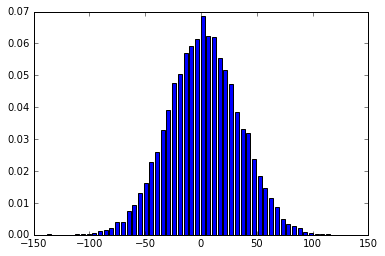

In [38]:
plot_hist(y)

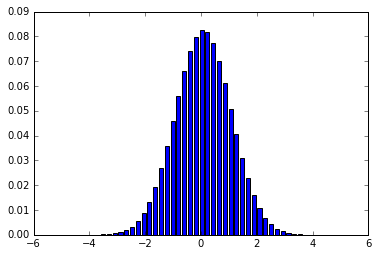

In [40]:
plot_hist(x)

In [41]:
def get_prob(x):
    hist, bins = np.histogram(x, bins=100)
    return hist/x.size

In [42]:
prob_y = get_prob(y)

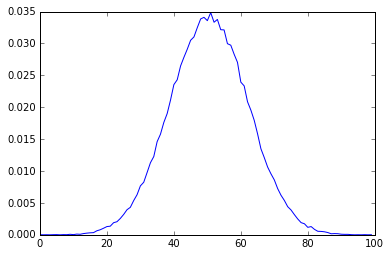

In [43]:
plt.plot(get_prob(np.random.randn(100000)))

In [127]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [142]:
# assume each row is a sample
def softmax(x):
    rebase_x = x - np.max(x, axis=1, keepdims=True)
    return np.exp(rebase_x) / np.sum(np.exp(rebase_x), axis=1, keepdims=True)

In [180]:
def mlp(w, m=10000, n=512, L=10):
    x = np.random.randn(m, n)
    for l in xrange(L):
        y = np.dot(x, w[l])
        x = np.maximum(0, y)
    out = softmax(y)
    return out

In [184]:
def init_w(n=512, L=20):
    w = {}
    for i in xrange(L):
        w[i] = np.random.normal(0, np.sqrt(2./n), (n, n))
    return w

In [185]:
def rescale_w(w, s):
    for i in w.keys():
        w[i] *= s

In [187]:
w = init_w(3, 2)

In [188]:
w

{0: array([[ 0.75204952, -0.73712173,  0.0413989 ],
        [-0.66553979, -0.79675154, -0.53355626],
        [-0.0488056 ,  1.41913121,  0.34935093]]),
 1: array([[ 0.6196001 , -0.44818204, -1.2812579 ],
        [ 0.50234022, -0.6281573 ,  0.04806198],
        [ 0.36432762,  0.63987053, -0.64037566]])}

In [189]:
rescale_w(w, 2)

In [190]:
w

{0: array([[ 1.50409904, -1.47424345,  0.08279781],
        [-1.33107958, -1.59350309, -1.06711252],
        [-0.09761121,  2.83826243,  0.69870185]]),
 1: array([[ 1.2392002 , -0.89636407, -2.56251581],
        [ 1.00468043, -1.2563146 ,  0.09612397],
        [ 0.72865523,  1.27974107, -1.28075133]])}

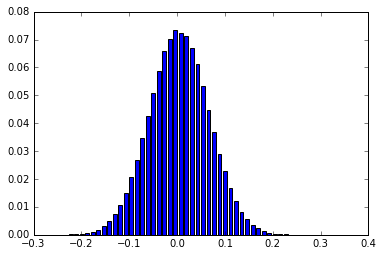

In [174]:
plot_hist(w[0])

In [175]:
scale = 2
for i in xrange(L):
    w[i] = scale * w[i]

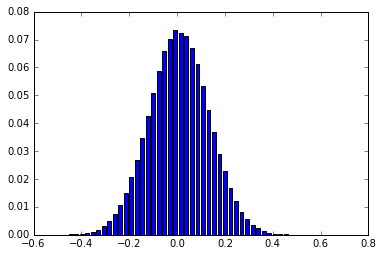

In [176]:
plot_hist(w[0])

In [177]:
x = np.random.randn(10000, n)
L = 20
for l in xrange(L):
    y = np.dot(x, w[l])
    x = np.maximum(0, y)
out = softmax(y)

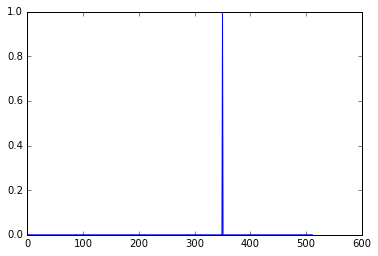

In [178]:
plt.plot(out[0, :])

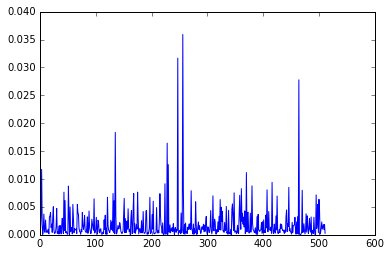

In [159]:
plt.plot(out_nscale[0, :])

In [157]:
np.sum(out[1, :])

1.0

In [153]:
out_nscale = out

In [134]:
n = 512
x = np.random.randn(100000, n)
# w = np.random.normal(0, np.sqrt(2./n), (n, n))
#w = np.random.normal(0, 1, (n, n))
L = 20
for l in xrange(L):
    w = np.random.normal(0, np.sqrt(2./n), (n, n))
    y = np.dot(x, w)
    #x = np.maximum(0, y)
    #x = sigmoid(y)
    x = np.minimum(1.0, np.maximum(0, y))
    print("layer {}, var {}".format(l, np.var(y)))

layer 0, var 1.99334276533
layer 1, var 0.63582287982
layer 2, var 0.409045198908
layer 3, var 0.31481873254
layer 4, var 0.285241067303
layer 5, var 0.254905598631
layer 6, var 0.25960089014
layer 7, var 0.240246508054
layer 8, var 0.194312826629
layer 9, var 0.193135526789
layer 10, var 0.180661403465
layer 11, var 0.190696973485
layer 12, var 0.179262994992
layer 13, var 0.15979253462
layer 14, var 0.171819025955
layer 15, var 0.178335706429
layer 16, var 0.192667550874
layer 17, var 0.182712030858
layer 18, var 0.167343069237
layer 19, var 0.166787585624


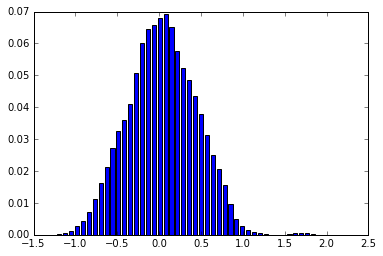

In [135]:
plot_hist(y)

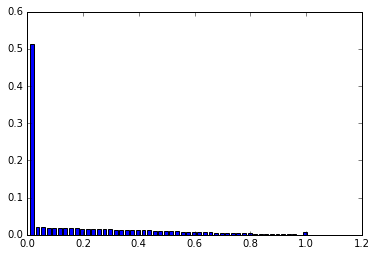

In [136]:
plot_hist(x)

In [107]:
np.var(y)

97.939600637876083

In [113]:
np.sum(z ** 2)/z.size

48.982563638086212

In [108]:
np.var(z)

33.464516018763739

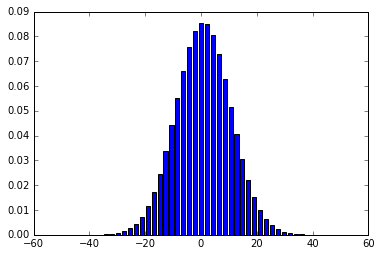

In [110]:
plot_hist(y)


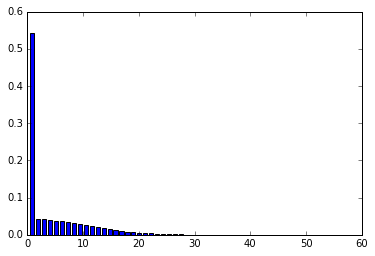

In [111]:
plot_hist(z)

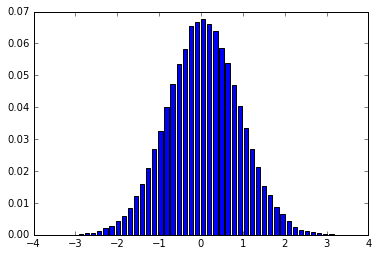

In [105]:
plot_hist(y[:, 0])

In [88]:
a = np.random.randn(100000)

In [89]:
b = np.maximum(0, a)

In [90]:
np.var(a)

0.99827025021984173

In [91]:
np.var(b)

0.34057953214162917